<a href="https://colab.research.google.com/github/ronanmccormack-ca/lstm-crop-yield-prediction/blob/main/Long_Short_Term_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Modules

In [ ]:
import pandas as pd
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Import Data

In [ ]:
data = pd.read_csv('/content/new_data_full.csv')
data['Division'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 17, 19])

In [ ]:
data = pd.read_csv('/content/new_data_full.csv')
data['Soil Type'] = data['Soil Type'].astype('category')
data['Soil Type'] = data['Soil Type'].cat.codes
data = data.drop(columns=['Division','Year']).dropna()

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data = pd.read_csv('merged.csv')

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Yield
0,1225.861432,1254.734411,701.439815,60.755567,72.496592,2079.636574,2022.585648,5954.432870,58.633900,76.737927,...,1613.208333,5467.057870,58.212199,72.366709,780.530093,794.199074,94.574074,78.200463,58.706599,1715.909091
1,825.442130,804.125000,4588.601852,58.239525,73.574093,1883.402778,1882.516204,2090.465278,65.799988,70.848210,...,702.043981,19.342593,77.519131,55.034159,977.490741,1006.819444,1586.622685,59.927894,73.768041,764.642857
2,1563.484919,1586.559165,558.263889,91.617662,65.280472,1284.254630,1322.895833,1276.009281,88.659259,66.325167,...,1604.405093,694.206019,57.168194,72.995596,1481.905093,1491.530093,660.930556,60.709583,72.590025,588.700000
3,1563.484919,1586.559165,558.263889,91.617662,65.280472,1284.254630,1322.895833,1276.009281,88.659259,66.325167,...,1604.405093,694.206019,57.168194,72.995596,1481.905093,1491.530093,660.930556,60.709583,72.590025,861.400000
4,1563.484919,1586.559165,558.263889,91.617662,65.280472,1284.254630,1322.895833,1276.009281,88.659259,66.325167,...,1604.405093,694.206019,57.168194,72.995596,1481.905093,1491.530093,660.930556,60.709583,72.590025,604.444444
5,1563.484919,1586.559165,558.263889,91.617662,65.280472,1284.254630,1322.895833,1276.009281,88.659259,66.325167,...,1604.405093,694.206019,57.168194,72.995596,1481.905093,1491.530093,660.930556,60.709583,72.590025,537.176471
6,1563.484919,1586.559165,558.263889,91.617662,65.280472,1284.254630,1322.895833,1276.009281,88.659259,66.325167,...,1604.405093,694.206019,57.168194,72.995596,1481.905093,1491.530093,660.930556,60.709583,72.590025,437.555556
7,1563.484919,1586.559165,558.263889,91.617662,65.280472,1284.254630,1322.895833,1276.009281,88.659259,66.325167,...,1604.405093,694.206019,57.168194,72.995596,1481.905093,1491.530093,660.930556,60.709583,72.590025,584.888889
8,1563.484919,1586.559165,558.263889,91.617662,65.280472,1284.254630,1322.895833,1276.009281,88.659259,66.325167,...,1604.405093,694.206019,57.168194,72.995596,1481.905093,1491.530093,660.930556,60.709583,72.590025,689.274854
9,1563.484919,1586.559165,558.263889,91.617662,65.280472,1284.254630,1322.895833,1276.009281,88.659259,66.325167,...,1604.405093,694.206019,57.168194,72.995596,1481.905093,1491.530093,660.930556,60.709583,72.590025,870.000000


In [ ]:
X = data.iloc[:, :-1]
y = data['Yield']

# Extra Code

In [ ]:
    # Compare the predictions with the actual values using scatter plots.
    plt.figure(figsize=(14, 6))

    # Training set
    plt.subplot(1, 2, 1)
    plt.scatter(y_train_original, y_train_pred, alpha=0.7)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Training Set - Actual vs. Predicted')

    # Fit a linear regression line to the training set
    m_train, b_train = np.polyfit(y_train_original.flatten(), y_train_pred.flatten(), 1)
    plt.plot(y_train_original, m_train * y_train_original + b_train, color='red', linestyle='--')

    # Testing set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test_original, y_test_pred, alpha=0.7)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Testing Set - Actual vs. Predicted')

    # Fit a linear regression line to the testing set
    m_test, b_test = np.polyfit(y_test_original.flatten(), y_test_pred.flatten(), 1)
    plt.plot(y_test_original, m_test * y_test_original + b_test, color='red', linestyle='--')

    #plt.show()

# Experiment 1 - Baseline model

In [ ]:
def lstm_model(X, y, input_shape=(1, 1),input_feature=None):
    if input_feature is not None:
        X = X.filter(regex=input_feature)

    scaler_X = StandardScaler()
    X_normalized = scaler_X.fit_transform(X)

    scaler_y = StandardScaler()
    y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

    X_train = X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1])
    X_test = X_test.reshape(X_test.shape[0], input_shape[0], input_shape[1])

    model = Sequential([
        LSTM(units=30, activation='relu', input_shape=input_shape),
        Dense(1)
    ])

    models = {'LSTM Baseline': model}

    scores = []

    for model_name, model in models.items():
        model.compile(optimizer='adam', loss='mse')
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

        # Extracting the loss values for each epoch
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Plotting the loss curve for training and validation
        plt.plot(loss, label='Training Loss')
        plt.plot(val_loss, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'{model_name} Loss Curve')
        plt.legend()
        plt.show()

        y_train_pred_normalized = model.predict(X_train)
        y_test_pred_normalized = model.predict(X_test)

        y_train_pred = scaler_y.inverse_transform(y_train_pred_normalized)
        y_test_pred = scaler_y.inverse_transform(y_test_pred_normalized)
        y_train_original = scaler_y.inverse_transform(y_train)
        y_test_original = scaler_y.inverse_transform(y_test)

        r2_train = r2_score(y_train_original, y_train_pred)
        r2_test = r2_score(y_test_original, y_test_pred)

        rmse_train = mean_squared_error(y_train_original, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test_original, y_test_pred, squared=False)

        scores.append((model_name, r2_train, rmse_train, r2_test, rmse_test))

    score_df = pd.DataFrame(scores, columns=['Model', 'R2 Training Score', 'RMSE Training Score', 'R2 Testing Score', 'RMSE Testing Score'])
    return score_df


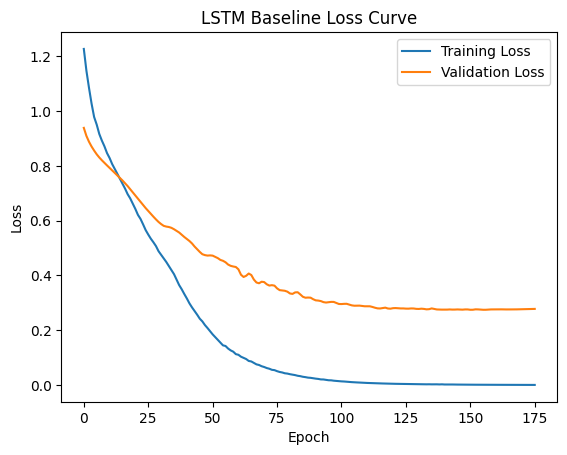

1/1 [==============================] - 0s 16ms/step


,Model,R2 Training Score,RMSE Training Score,R2 Testing Score,RMSE Testing Score
0,LSTM Baseline,0.939264,70.351718,0.619505,193.088709


In [ ]:
lstm_model(X,y,input_shape=(8,13))

# Experiment 2 - Activation Function

In [ ]:
def lstm_model(X, y, input_shape=(1, 1),input_feature=None):
    if input_feature is not None:
        X = X.filter(regex=input_feature)

    scaler_X = StandardScaler()
    X_normalized = scaler_X.fit_transform(X)

    scaler_y = StandardScaler()
    y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

    X_train = X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1])
    X_test = X_test.reshape(X_test.shape[0], input_shape[0], input_shape[1])

    model = Sequential([
        LSTM(units=30, activation='relu', input_shape=input_shape),
        Dense(1)
    ])

    model_activation = Sequential([
        LSTM(units=30, activation='relu', input_shape=input_shape),
        Dense(1,activation='linear')
    ])

    models = {'LSTM Baseline': model,
              'LSTM with Linear': model_activation}

    scores = []

    for model_name, model in models.items():
        model.compile(optimizer='adam', loss='mse')
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

        # Extracting the loss values for each epoch
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Plotting the loss curve for training and validation
        plt.plot(loss, label='Training Loss')
        plt.plot(val_loss, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'{model_name} Loss Curve')
        plt.legend()
        plt.show()

        y_train_pred_normalized = model.predict(X_train)
        y_test_pred_normalized = model.predict(X_test)

        y_train_pred = scaler_y.inverse_transform(y_train_pred_normalized)
        y_test_pred = scaler_y.inverse_transform(y_test_pred_normalized)
        y_train_original = scaler_y.inverse_transform(y_train)
        y_test_original = scaler_y.inverse_transform(y_test)

        r2_train = r2_score(y_train_original, y_train_pred)
        r2_test = r2_score(y_test_original, y_test_pred)

        rmse_train = mean_squared_error(y_train_original, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test_original, y_test_pred, squared=False)

        scores.append((model_name, r2_train, rmse_train, r2_test, rmse_test))

    score_df = pd.DataFrame(scores, columns=['Model', 'R2 Training Score', 'RMSE Training Score', 'R2 Testing Score', 'RMSE Testing Score'])
    return score_df


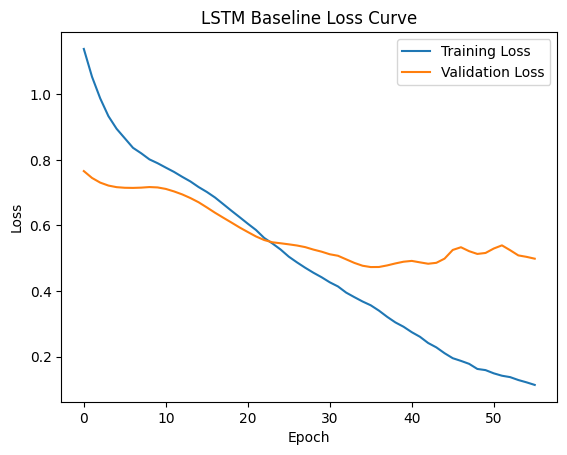

1/1 [==============================] - 0s 24ms/step


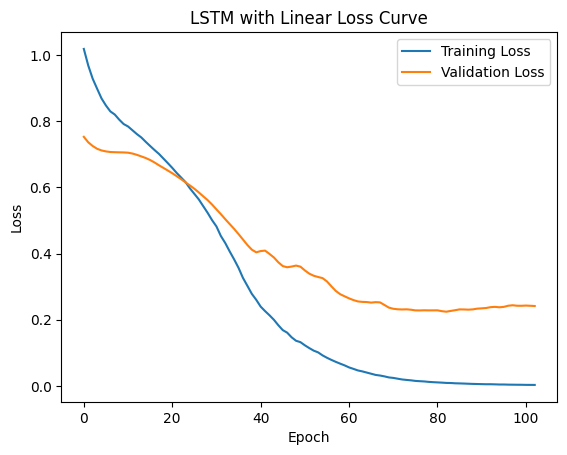

1/1 [==============================] - 0s 22ms/step


,Model,R2 Training Score,RMSE Training Score,R2 Testing Score,RMSE Testing Score
0,LSTM Baseline,0.614077,177.337945,0.501623,220.984210
1,LSTM with Linear,0.944287,67.379772,0.662423,181.873098


In [ ]:
lstm_model(X,y,input_shape=(8,13))

# Experiment 3 - Dropout Vs No Dropout & Optimal Units

In [ ]:
def lstm_model(X, y, input_shape=(1, 1), units=30, dropout_rate=0.5, input_feature=None):
    if input_feature is not None:
        X = X.filter(regex=input_feature)

    scaler_X = StandardScaler()
    X_normalized = scaler_X.fit_transform(X)

    scaler_y = StandardScaler()
    y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

    X_train = X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1])
    X_test = X_test.reshape(X_test.shape[0], input_shape[0], input_shape[1])

    model = Sequential([
        LSTM(units=units, activation='relu', input_shape=input_shape),
        Dropout(0.5),
        Dense(1,activation='linear')
    ])

    models = {'LSTM Model': model,}

    scores = []

    for model_name, model in models.items():
        model.compile(optimizer='adam', loss='mse')
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

        # Extracting the loss values for each epoch
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Plotting the loss curve for training and validation
        plt.plot(loss, label='Training Loss')
        plt.plot(val_loss, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'{model_name} Loss Curve')
        plt.legend()
        plt.show()

        y_train_pred_normalized = model.predict(X_train)
        y_test_pred_normalized = model.predict(X_test)

        y_train_pred = scaler_y.inverse_transform(y_train_pred_normalized)
        y_test_pred = scaler_y.inverse_transform(y_test_pred_normalized)
        y_train_original = scaler_y.inverse_transform(y_train)
        y_test_original = scaler_y.inverse_transform(y_test)

        r2_train = r2_score(y_train_original, y_train_pred)
        r2_test = r2_score(y_test_original, y_test_pred)

        rmse_train = mean_squared_error(y_train_original, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test_original, y_test_pred, squared=False)

        scores.append((model_name, r2_train, rmse_train, r2_test, rmse_test))

    score_df = pd.DataFrame(scores, columns=['Model', 'R2 Training Score', 'RMSE Training Score', 'R2 Testing Score', 'RMSE Testing Score'])
    return score_df


Running model with 30 LSTM units and 0 dropout rate


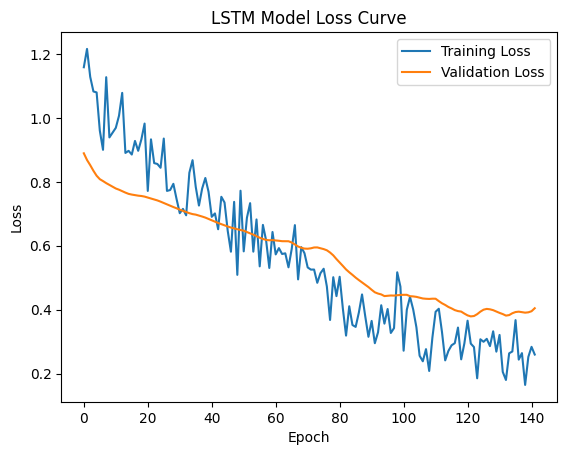

1/1 [==============================] - 0s 17ms/step
Running model with 30 LSTM units and 0.2 dropout rate


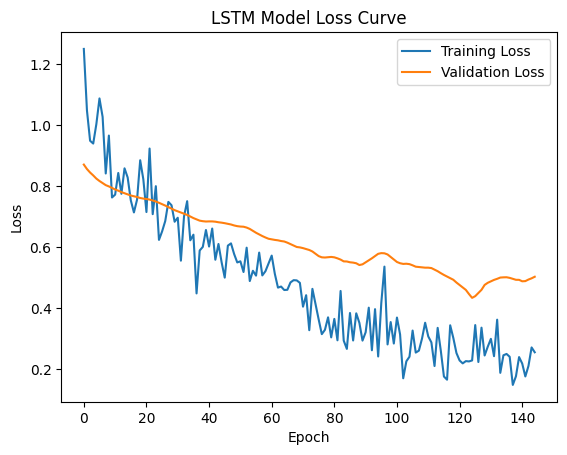

1/1 [==============================] - 0s 22ms/step
Running model with 30 LSTM units and 0.5 dropout rate


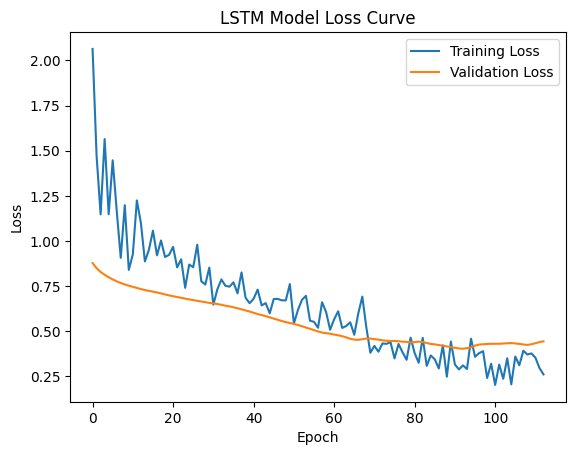

1/1 [==============================] - 0s 21ms/step
Running model with 90 LSTM units and 0 dropout rate


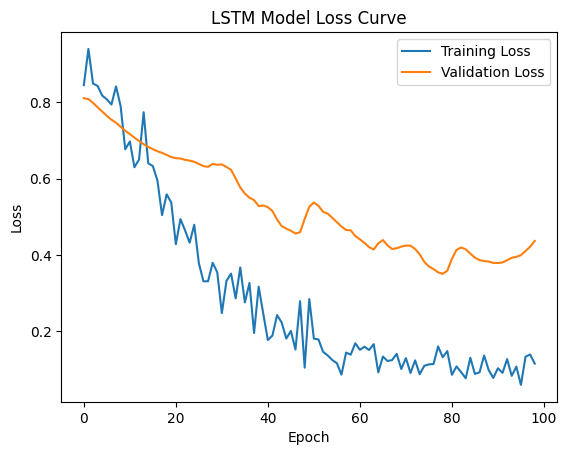

1/1 [==============================] - 0s 23ms/step
Running model with 90 LSTM units and 0.2 dropout rate


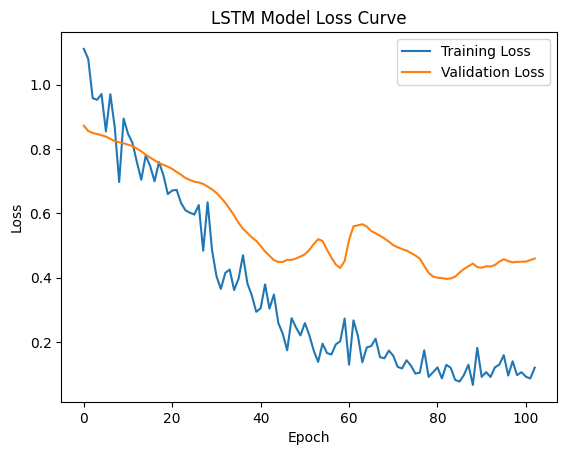

1/1 [==============================] - 0s 24ms/step
Running model with 90 LSTM units and 0.5 dropout rate


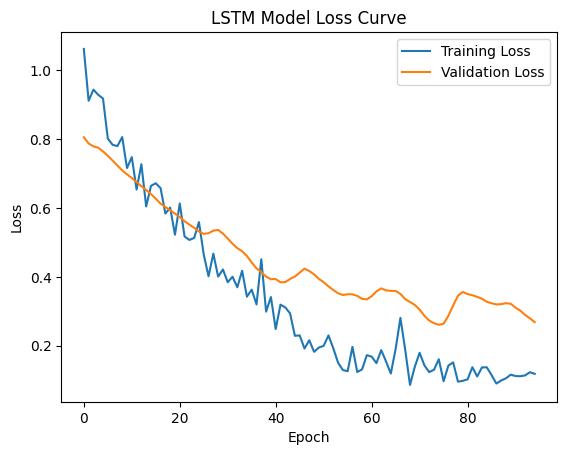

1/1 [==============================] - 0s 19ms/step
Running model with 150 LSTM units and 0 dropout rate


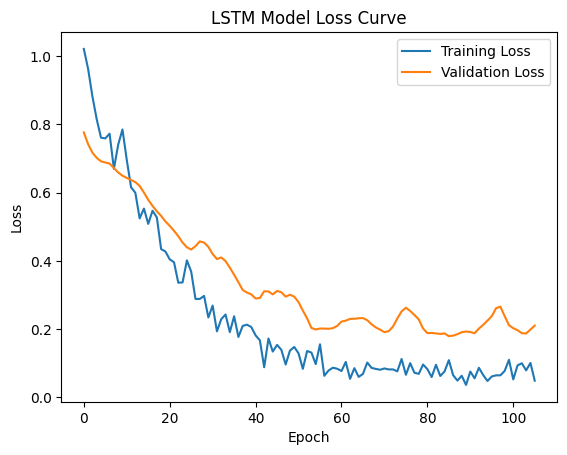

1/1 [==============================] - 0s 21ms/step
Running model with 150 LSTM units and 0.2 dropout rate


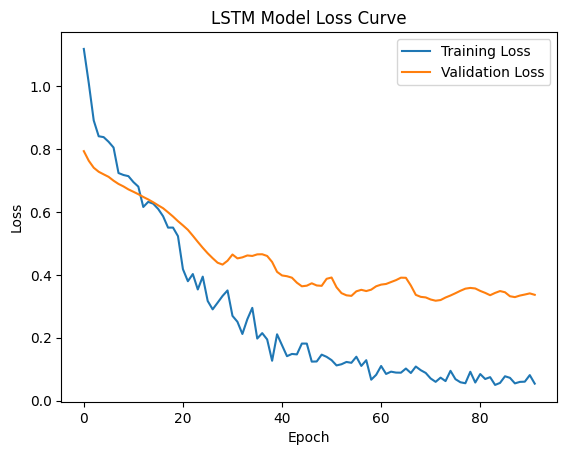

1/1 [==============================] - 0s 26ms/step
Running model with 150 LSTM units and 0.5 dropout rate


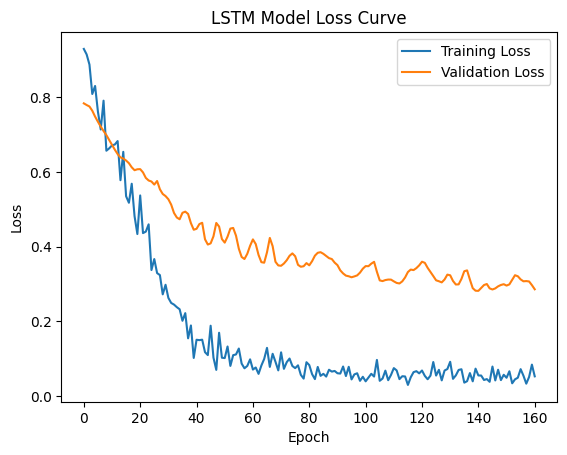

1/1 [==============================] - 0s 23ms/step
Running model with 300 LSTM units and 0 dropout rate


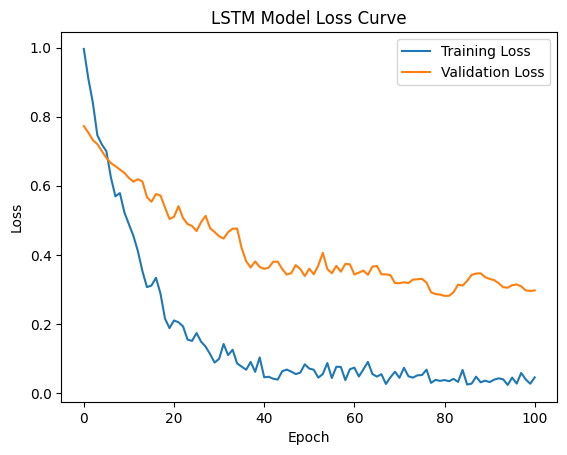

1/1 [==============================] - 0s 22ms/step
Running model with 300 LSTM units and 0.2 dropout rate


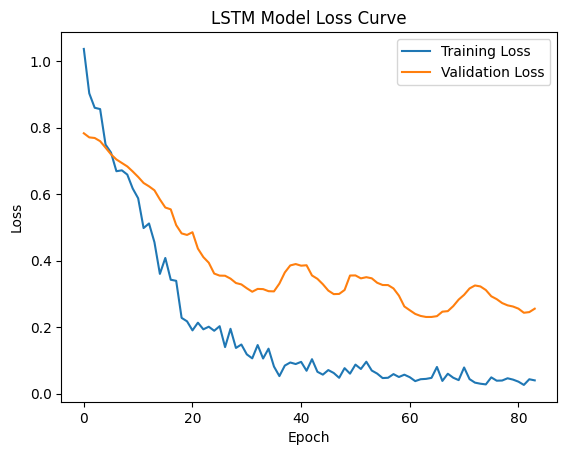

1/1 [==============================] - 0s 23ms/step
Running model with 300 LSTM units and 0.5 dropout rate


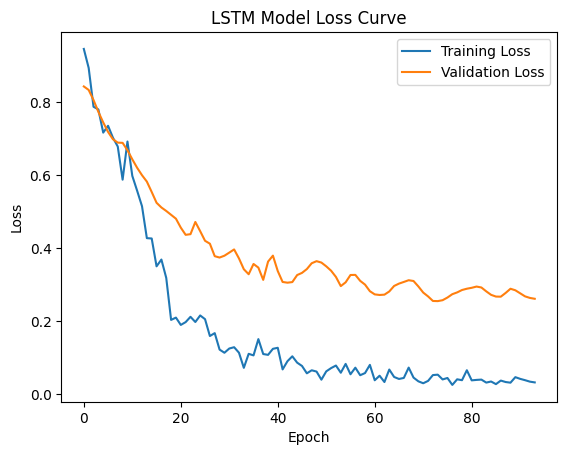

1/1 [==============================] - 0s 24ms/step


In [ ]:
# Define the range of LSTM units and dropout rates to loop over
units_list = [30, 90, 150, 300]
dropout_rates = [0, 0.2, 0.5]

# Placeholder to store results
results = []

# Loop over the units and dropout rates
for units in units_list:
    for dropout_rate in dropout_rates:
        print(f"Running model with {units} LSTM units and {dropout_rate} dropout rate")
        score_df = lstm_model(X, y, input_shape=(8, 13), units=units, dropout_rate=dropout_rate, input_feature=None)
        results.append((units, dropout_rate, score_df))

# Combine results into a single DataFrame
results_df = pd.concat([pd.concat([pd.DataFrame({'LSTM Units': units, 'Dropout Rate': dropout_rate}, index=[0]), df], axis=1)
                        for units, dropout_rate, df in results], ignore_index=True)

In [ ]:
results_df

,LSTM Units,Dropout Rate,Model,R2 Training Score,RMSE Training Score,R2 Testing Score,RMSE Testing Score
0,30,0.0,LSTM Model,0.811377,123.979020,0.616694,193.800545
1,30,0.2,LSTM Model,0.832551,116.813431,0.639983,187.820823
2,30,0.5,LSTM Model,0.771336,136.505491,0.651188,184.874862
3,90,0.0,LSTM Model,0.892563,93.568144,0.585894,201.436443
4,90,0.2,LSTM Model,0.875580,100.692189,0.564283,206.625866
5,90,0.5,LSTM Model,0.911316,85.010558,0.674347,178.632122
6,150,0.0,LSTM Model,0.948476,64.797337,0.717798,166.288525
7,150,0.2,LSTM Model,0.907107,87.004528,0.721942,165.063133
8,150,0.5,LSTM Model,0.929093,76.014607,0.728063,163.236206
9,300,0.0,LSTM Model,0.926798,77.234691,0.755426,154.805932


# Experiment 4 - Optimizer Comparison

In [ ]:
def lstm_model(X, y, input_shape=(1, 1), optimizer='adam', input_feature=None):
    if input_feature is not None:
        X = X.filter(regex=input_feature)

    scaler_X = StandardScaler()
    X_normalized = scaler_X.fit_transform(X)

    scaler_y = StandardScaler()
    y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

    X_train = X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1])
    X_test = X_test.reshape(X_test.shape[0], input_shape[0], input_shape[1])

    model = Sequential([
        LSTM(units=300, activation='relu', input_shape=input_shape),
        Dropout(0),
        Dense(1,activation='linear')
    ])

    models = {'LSTM Model': model}

    scores = []

    for model_name, model in models.items():
        model.compile(optimizer=optimizer, loss='mse')
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

        # Extracting the loss values for each epoch
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Plotting the loss curve for training and validation
        plt.plot(loss, label='Training Loss')
        plt.plot(val_loss, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'{model_name} Loss Curve')
        plt.legend()
        plt.show()

        y_train_pred_normalized = model.predict(X_train)
        y_test_pred_normalized = model.predict(X_test)

        y_train_pred = scaler_y.inverse_transform(y_train_pred_normalized)
        y_test_pred = scaler_y.inverse_transform(y_test_pred_normalized)
        y_train_original = scaler_y.inverse_transform(y_train)
        y_test_original = scaler_y.inverse_transform(y_test)

        r2_train = r2_score(y_train_original, y_train_pred)
        r2_test = r2_score(y_test_original, y_test_pred)

        rmse_train = mean_squared_error(y_train_original, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test_original, y_test_pred, squared=False)

        scores.append((model_name, r2_train, rmse_train, r2_test, rmse_test))

    score_df = pd.DataFrame(scores, columns=['Model', 'R2 Training Score', 'RMSE Training Score', 'R2 Testing Score', 'RMSE Testing Score'])
    return score_df


Running model with SGD optimizer


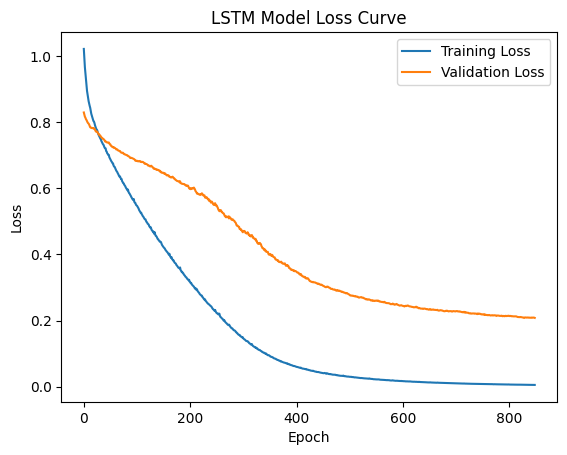

1/1 [==============================] - 0s 18ms/step
Running model with Momentum optimizer


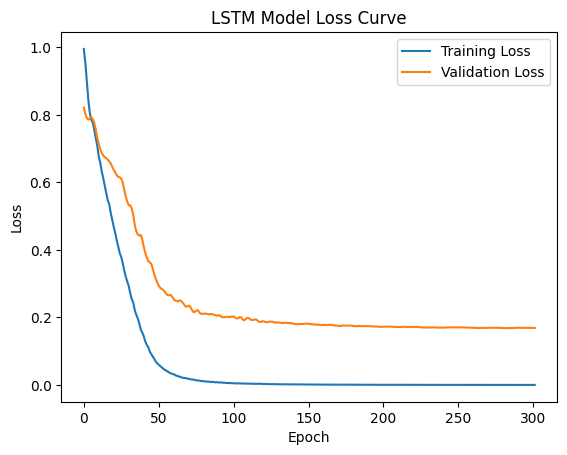

1/1 [==============================] - 0s 36ms/step
Running model with NAG optimizer


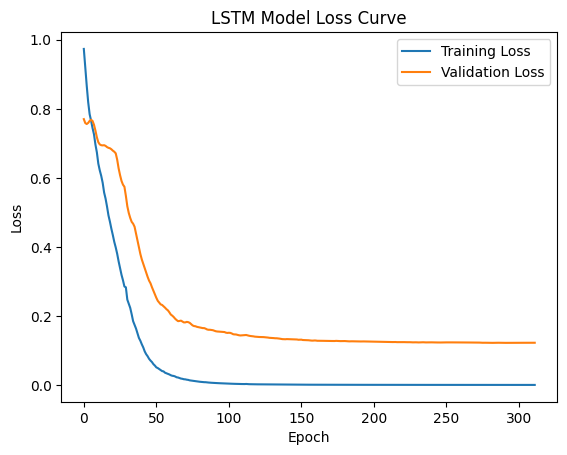

1/1 [==============================] - 0s 21ms/step
Running model with Adagrad optimizer


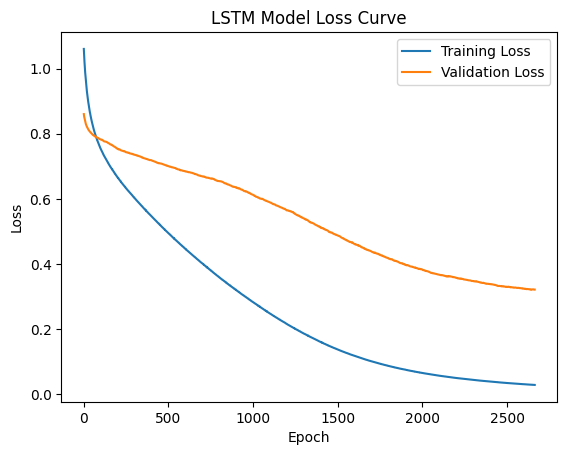

1/1 [==============================] - 0s 18ms/step
Running model with RMSprop optimizer


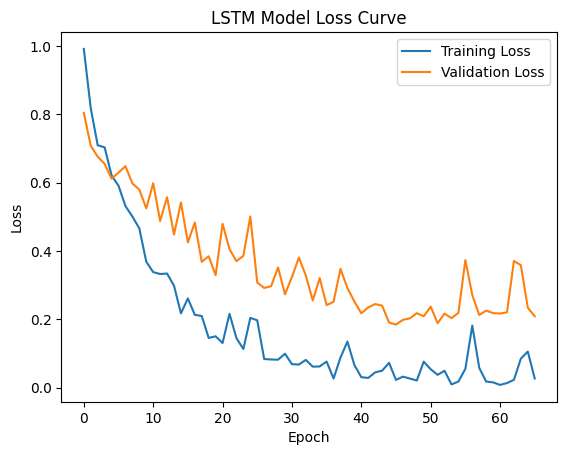

1/1 [==============================] - 0s 28ms/step
Running model with Adam optimizer


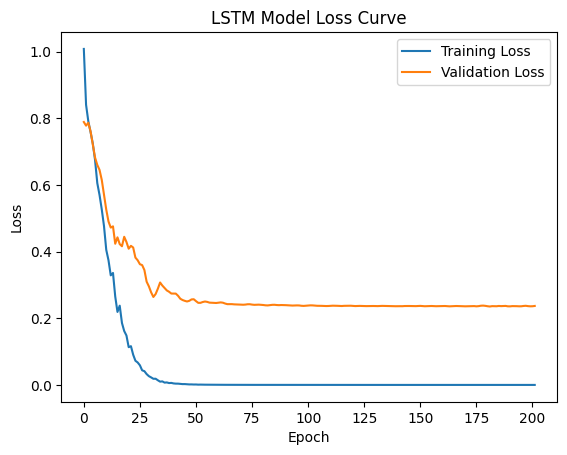

1/1 [==============================] - 0s 21ms/step
Running model with Adamax optimizer


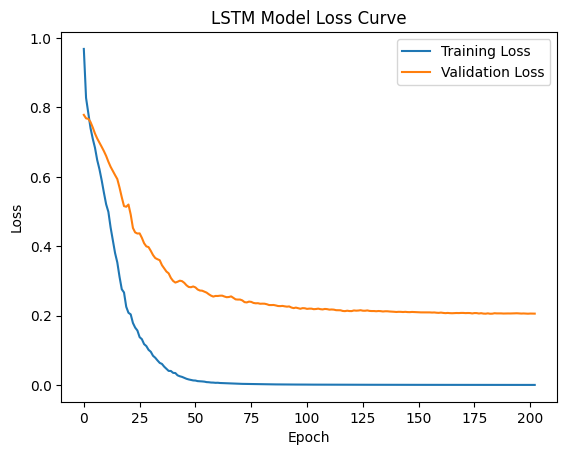

1/1 [==============================] - 0s 24ms/step
Running model with Nadam optimizer


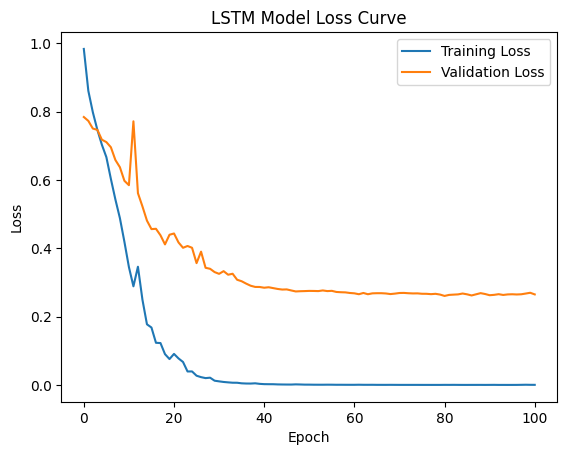

1/1 [==============================] - 0s 22ms/step
Running model with FTRL optimizer


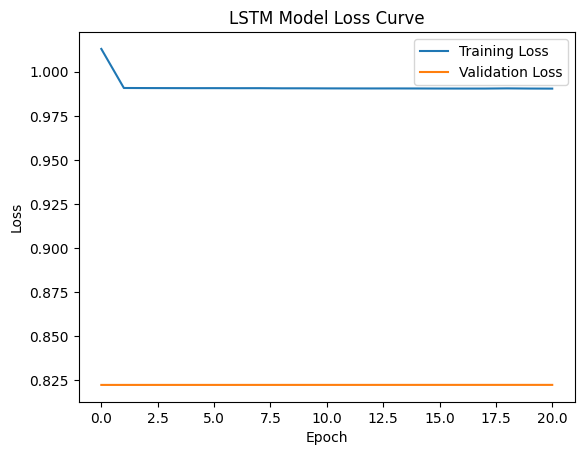

1/1 [==============================] - 0s 24ms/step


TypeError: ignored

In [ ]:
# Define the list of optimizers and their configurations to loop over
optimizer_list = [
    ('SGD', tf.keras.optimizers.SGD()),
    ('Momentum', tf.keras.optimizers.SGD(momentum=0.9)),
    ('NAG', tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)),
    ('Adagrad', tf.keras.optimizers.Adagrad()),
    ('RMSprop', tf.keras.optimizers.RMSprop()),
    ('Adam', tf.keras.optimizers.Adam()),
    ('Adamax', tf.keras.optimizers.Adamax()),
    ('Nadam', tf.keras.optimizers.Nadam()),
    ('FTRL', tf.keras.optimizers.Ftrl())
]

# Placeholder to store results
results = []

# Loop over the optimizers
for optimizer_name, optimizer in optimizer_list:
    print(f"Running model with {optimizer_name} optimizer")
    score_df = lstm_model(X, y, input_shape=(8, 13), optimizer=optimizer, input_feature=None)
    results.append((optimizer_name, score_df))

# Combine results into a single DataFrame
results_df = pd.concat([pd.concat([pd.DataFrame({'Optimizer': optimizer_name}, index=[0]), df], axis=1)
                        for optimizer_name, df in results], ignore_index=True)

In [ ]:
# Combine results into a single DataFrame
results_df = pd.concat([pd.concat([pd.DataFrame({'Optimizer': optimizer_name}, index=[0]), df], axis=1)
                        for optimizer_name, df in results], ignore_index=True)
results_df

,Optimizer,Model,R2 Training Score,RMSE Training Score,R2 Testing Score,RMSE Testing Score
0,SGD,LSTM Model,0.950436,63.552612,0.797756,140.773116
1,Momentum,LSTM Model,0.963365,54.638396,0.700616,171.275886
2,NAG,LSTM Model,0.973545,46.430664,0.741251,159.228663
3,Adagrad,LSTM Model,0.906884,87.109141,0.720017,165.633413
4,RMSprop,LSTM Model,0.925088,78.131631,0.802956,138.951551
5,Adam,LSTM Model,0.949109,64.398134,0.707549,169.281298
6,Adamax,LSTM Model,0.955464,60.242805,0.727941,163.272653
7,Nadam,LSTM Model,0.943529,67.836477,0.660209,182.468567
8,FTRL,LSTM Model,-0.001575,285.688516,-0.021915,316.438690


# Final Model

In [ ]:
def lstm_model(X, y, input_shape=(1, 1),model_name='LSTM'):
    scaler_X = StandardScaler()
    X_normalized = scaler_X.fit_transform(X)

    scaler_y = StandardScaler()
    y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

    X_train = X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1])
    X_test = X_test.reshape(X_test.shape[0], input_shape[0], input_shape[1])

    model = Sequential([
        LSTM(units=300, activation='relu', input_shape=input_shape),
        Dropout(0),
        Dense(1,activation='linear')
    ])

    models = {model_name: model}

    scores = []

    for model_name, model in models.items():
        model.compile(optimizer='sgd', loss='mse')
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs=5000, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

        # Extracting the loss values for each epoch
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        # Plotting the loss curve for training and validation
        plt.plot(loss, label='Training Loss')
        plt.plot(val_loss, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'{model_name} Loss Curve')
        plt.legend()
        plt.show()

        y_train_pred_normalized = model.predict(X_train)
        y_test_pred_normalized = model.predict(X_test)

        y_train_pred = scaler_y.inverse_transform(y_train_pred_normalized)
        y_test_pred = scaler_y.inverse_transform(y_test_pred_normalized)
        y_train_original = scaler_y.inverse_transform(y_train)
        y_test_original = scaler_y.inverse_transform(y_test)

        r2_train = r2_score(y_train_original, y_train_pred)
        r2_test = r2_score(y_test_original, y_test_pred)

        rmse_train = mean_squared_error(y_train_original, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test_original, y_test_pred, squared=False)

        scores.append((model_name, r2_train, rmse_train, r2_test, rmse_test))

    score_df = pd.DataFrame(scores, columns=['Model', 'R2 Training Score', 'RMSE Training Score', 'R2 Testing Score', 'RMSE Testing Score'])
    return score_df, model


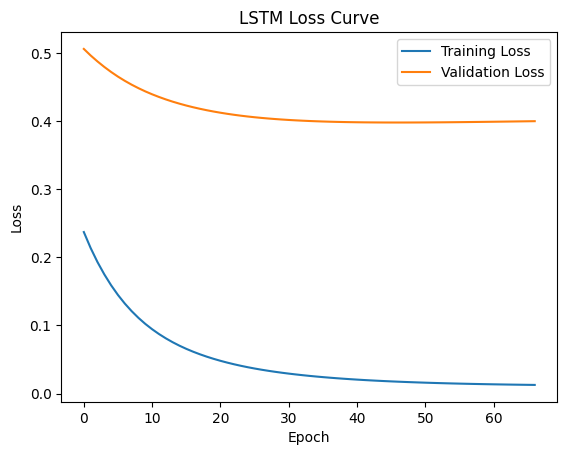

1/1 [==============================] - 0s 77ms/step


(  Model  R2 Training Score  RMSE Training Score  R2 Testing Score  \
 0  LSTM           0.235953           112.548893         -0.601365   
 
    RMSE Testing Score  
 0          627.890249  ,
 <keras.engine.sequential.Sequential at 0x7fa6f39790a0>)

In [ ]:
lstm_model(X,y,input_shape=(1,X.shape[1]))

# Experiment 5 - Feature Reduction Techniques

In [ ]:
def perform_recursive_feature_elimination(X, y, percentage_of_features=0.1):
    # Instantiate a linear regression model
    model = LinearRegression()

    # Calculate the number of features to select based on the given percentage
    n_features_to_select = ceil(X.shape[1] * percentage_of_features)

    # Create the RFE object with a linear regression estimator
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

    # Fit the RFE object to the data
    rfe.fit(X, y)

    # Get the ranking of features
    feature_ranking = rfe.ranking_

    # Sort features by their ranking
    sorted_features = sorted(zip(X.columns, feature_ranking), key=lambda x: x[1])

    # Select the top N features
    selected_features = [feature for feature, rank in sorted_features[:n_features_to_select]]

    # Extract the subset of data with the selected features
    X_selected = X[selected_features]

    return selected_features, X_selected


Performing feature selection with 10.0% of features
Selected features: ['1_Average of Average Temperature', '1_Average of Min Temperature', '3_Average of Max Temperature', '3_Average of Average Temperature', '4_Average of Max Temperature', '4_Average of Average Temperature', '5_Average of Max Temperature', '6_Average of Average Temperature', '7_Average of Max Temperature', '8_Average of Max Temperature', '8_Average of Average Temperature']
Shape of X_selected: (79, 11)


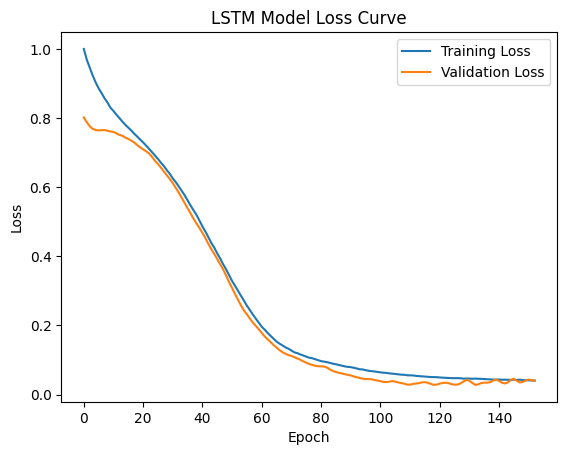

1/1 [==============================] - 0s 19ms/step
Performing feature selection with 20.0% of features
Selected features: ['1_Average of Max Temperature', '1_Average of Average Temperature', '1_Average of Min Temperature', '3_Average of Max Temperature', '3_Average of Average Temperature', '4_Average of Max Temperature', '4_Average of Average Temperature', '4_Average of Min Temperature', '5_Average of Max Temperature', '5_Average of Average Temperature', '5_Average of Min Temperature', '6_Average of Long Precipitation', '6_Average of Max Temperature', '6_Average of Average Temperature', '6_Average of Min Temperature', '7_Average of Max Temperature', '7_Average of Min Temperature', '8_Average of Long Precipitation', '8_Average of Max Temperature', '8_Average of Average Temperature', '8_Average of Min Temperature']
Shape of X_selected: (79, 21)


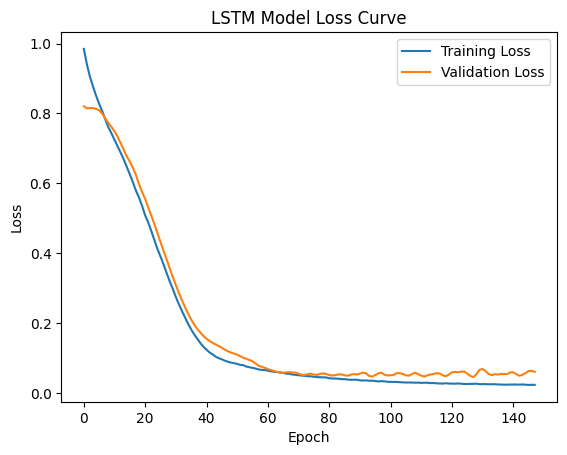

1/1 [==============================] - 0s 16ms/step
Performing feature selection with 30.0% of features
Selected features: ['1_Average of Soil Temp. 050 cm ', '1_Average of Soil Temp. 100 cm ', '1_Average of Max Temperature', '1_Average of Average Temperature', '1_Average of Min Temperature', '2_Average of Soil Temp. 050 cm ', '2_Average of Soil Temp. 100 cm ', '2_Average of Long Precipitation', '2_Average of Average Temperature', '2_Average of Min Temperature', '3_Average of Soil Temp. 050 cm ', '3_Average of Long Precipitation', '3_Average of Max Temperature', '3_Average of Average Temperature', '4_Average of Long Precipitation', '4_Average of Max Temperature', '4_Average of Average Temperature', '4_Average of Min Temperature', '5_Average of Max Temperature', '5_Average of Average Temperature', '5_Average of Min Temperature', '6_Average of Long Precipitation', '6_Average of Max Temperature', '6_Average of Average Temperature', '6_Average of Min Temperature', '7_Average of Long Precip

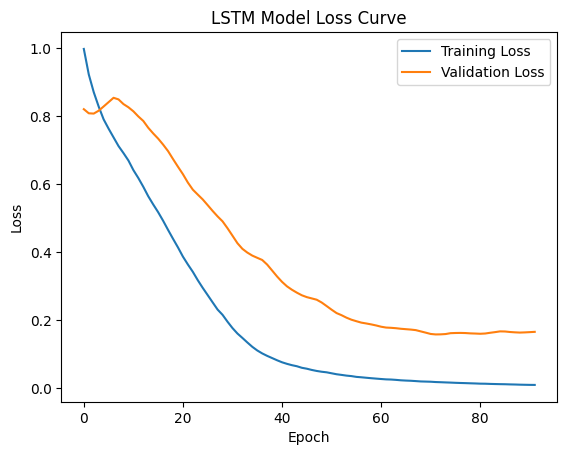

1/1 [==============================] - 0s 23ms/step
Performing feature selection with 40.0% of features
Selected features: ['1_Average of Soil Temp. 050 cm ', '1_Average of Soil Temp. 100 cm ', '1_Average of Long Precipitation', '1_Average of Max Temperature', '1_Average of Average Temperature', '1_Average of Min Temperature', '2_Average of Soil Temp. 020 cm ', '2_Average of Soil Temp. 050 cm ', '2_Average of Soil Temp. 100 cm ', '2_Average of Long Precipitation', '2_Average of Max Temperature', '2_Average of Average Temperature', '2_Average of Min Temperature', '3_Average of Soil Temp. 020 cm ', '3_Average of Soil Temp. 050 cm ', '3_Average of Long Precipitation', '3_Average of Max Temperature', '3_Average of Average Temperature', '4_Average of Soil Temp. 050 cm ', '4_Average of Soil Temp. 100 cm ', '4_Average of Long Precipitation', '4_Average of Max Temperature', '4_Average of Average Temperature', '4_Average of Min Temperature', '5_Average of Soil Temp. 005 cm ', '5_Average of Soil

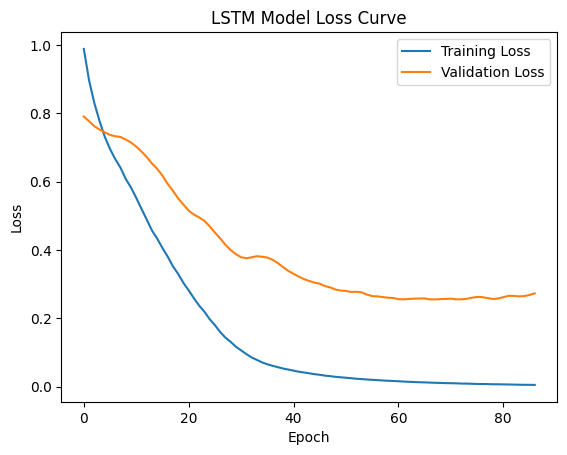

1/1 [==============================] - 0s 21ms/step
Performing feature selection with 50.0% of features
Selected features: ['1_Average of Soil Temp. 050 cm ', '1_Average of Soil Temp. 100 cm ', '1_Average of Long Precipitation', '1_Average of Max Temperature', '1_Average of Average Temperature', '1_Average of Min Temperature', '2_Average of Soil Temp. 020 cm ', '2_Average of Soil Temp. 050 cm ', '2_Average of Soil Temp. 100 cm ', '2_Average of Soil Moisture 050 cm ', '2_Average of Long Precipitation', '2_Average of Max Temperature', '2_Average of Average Temperature', '2_Average of Min Temperature', '3_Average of Soil Temp. 020 cm ', '3_Average of Soil Temp. 050 cm ', '3_Average of Soil Temp. 100 cm ', '3_Average of Soil Moisture 050 cm ', '3_Average of Long Precipitation', '3_Average of Max Temperature', '3_Average of Average Temperature', '4_Average of Soil Temp. 020 cm ', '4_Average of Soil Temp. 050 cm ', '4_Average of Soil Temp. 100 cm ', '4_Average of Long Precipitation', '4_Aver

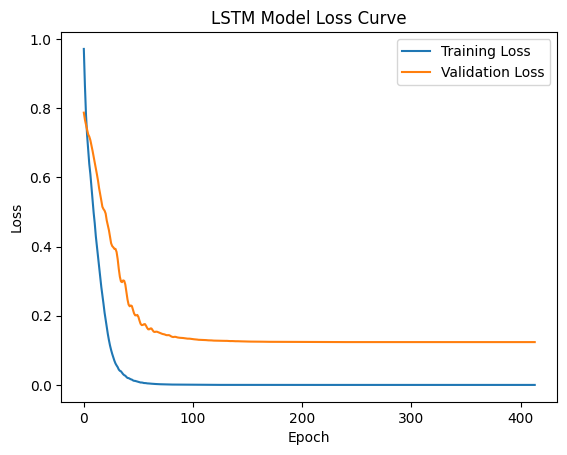

1/1 [==============================] - 0s 18ms/step
Performing feature selection with 60.0% of features
Selected features: ['1_Average of Soil Temp. 050 cm ', '1_Average of Soil Temp. 100 cm ', '1_Average of Soil Moisture 020 cm ', '1_Average of Soil Moisture 100 cm ', '1_Average of Long Precipitation', '1_Average of Max Temperature', '1_Average of Average Temperature', '1_Average of Min Temperature', '2_Average of Soil Temp. 020 cm ', '2_Average of Soil Temp. 050 cm ', '2_Average of Soil Temp. 100 cm ', '2_Average of Soil Moisture 050 cm ', '2_Average of Soil Moisture 100 cm ', '2_Average of Long Precipitation', '2_Average of Max Temperature', '2_Average of Average Temperature', '2_Average of Min Temperature', '3_Average of Soil Temp. 020 cm ', '3_Average of Soil Temp. 050 cm ', '3_Average of Soil Temp. 100 cm ', '3_Average of Soil Moisture 050 cm ', '3_Average of Long Precipitation', '3_Average of Max Temperature', '3_Average of Average Temperature', '4_Average of Soil Temp. 020 cm '

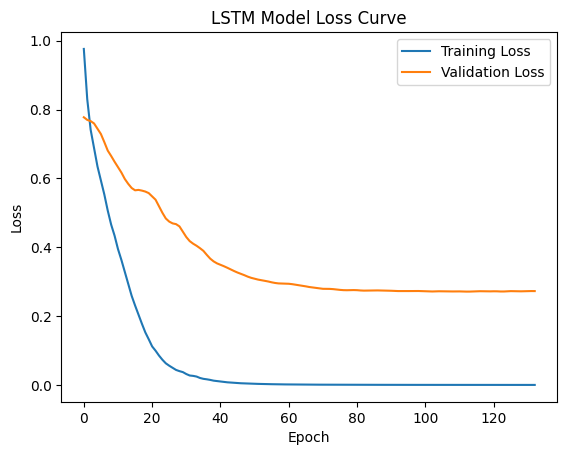

1/1 [==============================] - 0s 29ms/step
Performing feature selection with 70.0% of features
Selected features: ['1_Average of Soil Temp. 020 cm ', '1_Average of Soil Temp. 050 cm ', '1_Average of Soil Temp. 100 cm ', '1_Average of Soil Moisture 020 cm ', '1_Average of Soil Moisture 100 cm ', '1_Average of Long Precipitation', '1_Average of Max Temperature', '1_Average of Average Temperature', '1_Average of Min Temperature', '2_Average of Soil Temp. 005 cm ', '2_Average of Soil Temp. 020 cm ', '2_Average of Soil Temp. 050 cm ', '2_Average of Soil Temp. 100 cm ', '2_Average of Soil Moisture 050 cm ', '2_Average of Soil Moisture 100 cm ', '2_Average of Long Precipitation', '2_Average of Precip. ', '2_Average of Max Temperature', '2_Average of Average Temperature', '2_Average of Min Temperature', '3_Average of Soil Temp. 005 cm ', '3_Average of Soil Temp. 020 cm ', '3_Average of Soil Temp. 050 cm ', '3_Average of Soil Temp. 100 cm ', '3_Average of Soil Moisture 050 cm ', '3_Ave

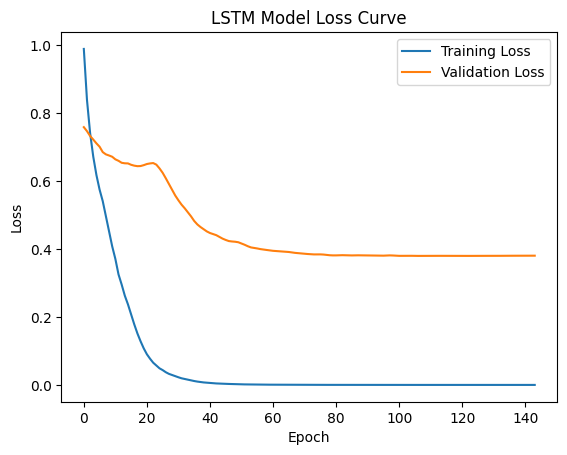

1/1 [==============================] - 0s 23ms/step
Performing feature selection with 80.0% of features
Selected features: ['1_Average of Soil Temp. 005 cm ', '1_Average of Soil Temp. 020 cm ', '1_Average of Soil Temp. 050 cm ', '1_Average of Soil Temp. 100 cm ', '1_Average of Soil Moisture 020 cm ', '1_Average of Soil Moisture 100 cm ', '1_Average of Long Precipitation', '1_Average of Precip. ', '1_Average of Max Temperature', '1_Average of Average Temperature', '1_Average of Min Temperature', '2_Average of Soil Temp. 005 cm ', '2_Average of Soil Temp. 020 cm ', '2_Average of Soil Temp. 050 cm ', '2_Average of Soil Temp. 100 cm ', '2_Average of Soil Moisture 005 cm ', '2_Average of Soil Moisture 050 cm ', '2_Average of Soil Moisture 100 cm ', '2_Average of Long Precipitation', '2_Average of Precip. ', '2_Average of Max Temperature', '2_Average of Average Temperature', '2_Average of Min Temperature', '3_Average of Soil Temp. 005 cm ', '3_Average of Soil Temp. 020 cm ', '3_Average of So

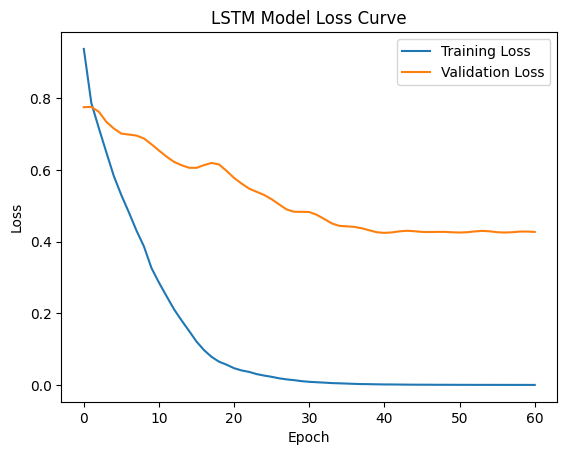

1/1 [==============================] - 0s 17ms/step
Performing feature selection with 90.0% of features
Selected features: ['1_Average of Soil Temp. 005 cm ', '1_Average of Soil Temp. 020 cm ', '1_Average of Soil Temp. 050 cm ', '1_Average of Soil Temp. 100 cm ', '1_Average of Soil Moisture 005 cm ', '1_Average of Soil Moisture 020 cm ', '1_Average of Soil Moisture 100 cm ', '1_Average of Long Precipitation', '1_Average of Precip. ', '1_Average of Max Temperature', '1_Average of Average Temperature', '1_Average of Min Temperature', '2_Average of Soil Temp. 005 cm ', '2_Average of Soil Temp. 020 cm ', '2_Average of Soil Temp. 050 cm ', '2_Average of Soil Temp. 100 cm ', '2_Average of Soil Moisture 005 cm ', '2_Average of Soil Moisture 020 cm ', '2_Average of Soil Moisture 050 cm ', '2_Average of Soil Moisture 100 cm ', '2_Average of Long Precipitation', '2_Average of Precip. ', '2_Average of Max Temperature', '2_Average of Average Temperature', '2_Average of Min Temperature', '3_Average

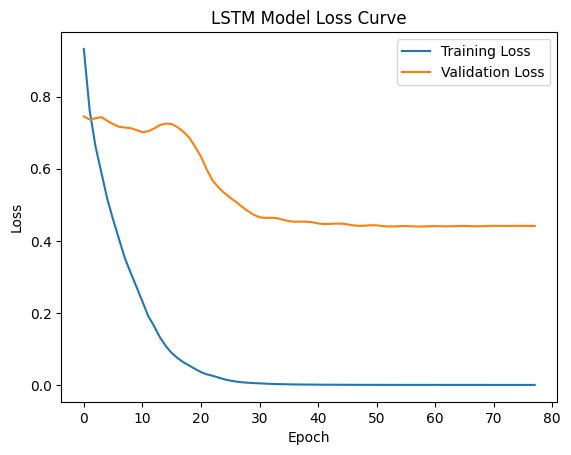

1/1 [==============================] - 0s 29ms/step
Performing feature selection with 100.0% of features
Selected features: ['1_Average of Soil Temp. 005 cm ', '1_Average of Soil Temp. 020 cm ', '1_Average of Soil Temp. 050 cm ', '1_Average of Soil Temp. 100 cm ', '1_Average of Soil Moisture 005 cm ', '1_Average of Soil Moisture 020 cm ', '1_Average of Soil Moisture 050 cm ', '1_Average of Soil Moisture 100 cm ', '1_Average of Long Precipitation', '1_Average of Precip. ', '1_Average of Max Temperature', '1_Average of Average Temperature', '1_Average of Min Temperature', '2_Average of Soil Temp. 005 cm ', '2_Average of Soil Temp. 020 cm ', '2_Average of Soil Temp. 050 cm ', '2_Average of Soil Temp. 100 cm ', '2_Average of Soil Moisture 005 cm ', '2_Average of Soil Moisture 020 cm ', '2_Average of Soil Moisture 050 cm ', '2_Average of Soil Moisture 100 cm ', '2_Average of Long Precipitation', '2_Average of Precip. ', '2_Average of Max Temperature', '2_Average of Average Temperature', '2_

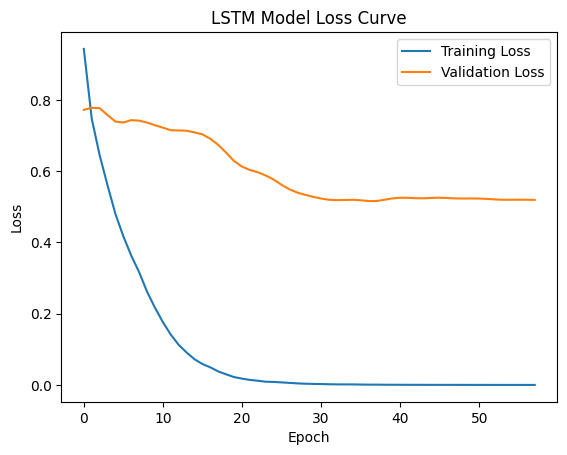

1/1 [==============================] - 0s 21ms/step
        Model  R2 Training Score  RMSE Training Score  R2 Testing Score  \
0  LSTM Model           0.956265            59.699014          0.970134   
1  LSTM Model           0.968828            50.400302          0.940012   
2  LSTM Model           0.952160            62.437565          0.635918   
3  LSTM Model           0.935102            72.722007          0.682231   
4  LSTM Model           0.973235            46.702223          0.789596   
5  LSTM Model           0.941322            69.149712          0.749537   
6  LSTM Model           0.917866            81.811280          0.667142   
7  LSTM Model           0.907021            87.044726          0.676637   
8  LSTM Model           0.904943            88.012169          0.643801   
9  LSTM Model           0.887879            95.586122          0.583183   

   RMSE Testing Score  Percentage  
0           54.096761        10.0  
1           76.668065        20.0  
2          188

In [ ]:
# Define a list to store the results
results = []

# Iterate over percentages from 0.1 to 1 (inclusive) with a step of 0.1
for percentage in [i/10 for i in range(1, 11)]:
    print(f"Performing feature selection with {percentage * 100}% of features")
    selected_features, X_selected = perform_recursive_feature_elimination(X, y, percentage_of_features=percentage)
    print(f"Selected features: {selected_features}")
    print(f"Shape of X_selected: {X_selected.shape}")
    
    # Calculate the input_shape based on X_selected
    input_shape = (1, X_selected.shape[1])

    # Run lstm_model for the selected features
    score_df = lstm_model(X_selected, y, input_shape=input_shape)
    
    # Add the percentage to the score_df
    score_df['Percentage'] = percentage * 100
    
    # Append the score_df to the results list
    results.append(score_df)

# Concatenate results into a single DataFrame
results_df = pd.concat(results, ignore_index=True)

# Display the results DataFrame
print(results_df)


In [ ]:
results_df

,Model,R2 Training Score,RMSE Training Score,R2 Testing Score,RMSE Testing Score,Percentage
0,LSTM Model,0.956265,59.699014,0.970134,54.096761,10.0
1,LSTM Model,0.968828,50.400302,0.940012,76.668065,20.0
2,LSTM Model,0.952160,62.437565,0.635918,188.878077,30.0
3,LSTM Model,0.935102,72.722007,0.682231,176.456520,40.0
4,LSTM Model,0.973235,46.702223,0.789596,143.585194,50.0
5,LSTM Model,0.941322,69.149712,0.749537,156.658653,60.0
6,LSTM Model,0.917866,81.811280,0.667142,180.597621,70.0
7,LSTM Model,0.907021,87.044726,0.676637,178.002992,80.0
8,LSTM Model,0.904943,88.012169,0.643801,186.822156,90.0
9,LSTM Model,0.887879,95.586122,0.583183,202.094796,100.0


# Decision Tree Feature Selection

In [ ]:
def decision_tree(X,y):
  # Get the features from X
  feature_names = list(X.columns)

  # Create a decision tree regressor
  regressor = DecisionTreeRegressor()

  # Use SelectFromModel to select the most important features based on the decision tree regressor
  selector = SelectFromModel(regressor)
  selector.fit(X, y)

  # Get the selected feature indices
  selected_features = selector.get_support(indices=True)

  # Get the corresponding feature names
  selected_feature_names = [feature_names[i] for i in selected_features]

  # Return a subset of X based on the selected features
  return X.iloc[:, selected_features]

In [ ]:
X_decision = decision_tree(X,y)

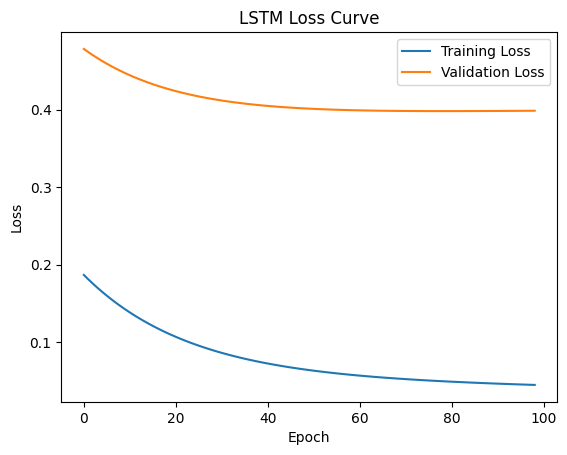

1/1 [==============================] - 0s 21ms/step


(  Model  R2 Training Score  RMSE Training Score  R2 Testing Score  \
 0  LSTM           0.072316           124.017029         -0.634559   
 
    RMSE Testing Score  
 0          634.364431  ,
 <keras.engine.sequential.Sequential at 0x7fa686e4b490>)

In [ ]:
lstm_model(X_decision,y,input_shape=(1,X_decision.shape[1]))

# Random Forest Feature Selection

In [ ]:
def random_forest(X,y):
  # Get the features from X
  feature_names = list(X.columns)

  # Create a decision tree regressor
  regressor = RandomForestRegressor()

  # Use SelectFromModel to select the most important features based on the decision tree regressor
  selector = SelectFromModel(regressor)
  selector.fit(X, y)

  # Get the selected feature indices
  selected_features = selector.get_support(indices=True)

  # Get the corresponding feature names
  selected_feature_names = [feature_names[i] for i in selected_features]

  # Return a subset of X based on the selected features
  return X.iloc[:, selected_features]

In [ ]:
X_random = random_forest(X,y)

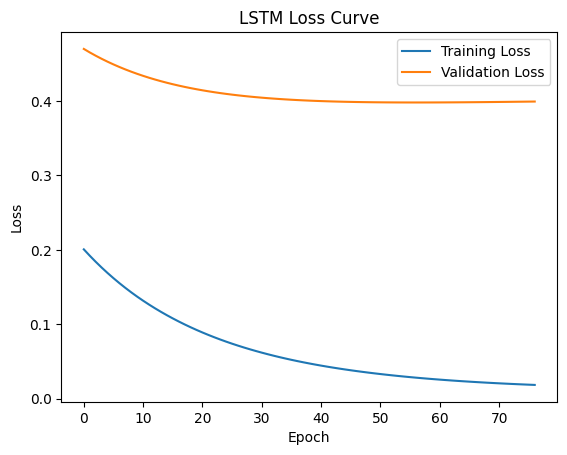

1/1 [==============================] - 0s 22ms/step


(  Model  R2 Training Score  RMSE Training Score  R2 Testing Score  \
 0  LSTM           0.182152           116.444104         -0.669809   
 
    RMSE Testing Score  
 0          641.168273  ,
 <keras.engine.sequential.Sequential at 0x7fa686aff280>)

In [ ]:
lstm_model(X_random,y,input_shape=(1,X_random.shape[1]))

# Experiment 6 - RF Feature Selection Hyperparameter Tuning

In [ ]:
def random_forest_tuning(X, y):
    # Get the features from X
    feature_names = list(X.columns)

    # Define the parameter grid for the RandomForestRegressor
    param_grid = {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create a base RandomForestRegressor
    base_regressor = RandomForestRegressor()

    # Create the GridSearchCV object with the RandomForestRegressor and the parameter grid
    grid_search = GridSearchCV(estimator=base_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

    # Fit the GridSearchCV object to your data
    grid_search.fit(X, y)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_

    # Create the optimized RandomForestRegressor with the best parameters
    regressor = RandomForestRegressor(**best_params)

    # Use SelectFromModel to select the most important features based on the decision tree regressor
    selector = SelectFromModel(regressor)
    selector.fit(X, y)

    # Get the selected feature indices
    selected_features = selector.get_support(indices=True)

    # Get the corresponding feature names
    selected_feature_names = [feature_names[i] for i in selected_features]

    # Return a subset of X based on the selected features and the best parameters
    return X.iloc[:, selected_features], best_params

In [ ]:
X_tuned, best_params = random_forest_tuning(X, y)
#print("Selected Features:", X_selected.columns)
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}


In [ ]:
lstm_model(X_tuned,y,input_shape=(1,X_tuned.shape[1]),model_name='Random Forest Tuned')

# Experiment 7 - DT Feature Selection Hyperparameter Tuning

In [ ]:
def decision_tree_tuning(X, y):
    # Get the features from X
    feature_names = list(X.columns)

    # Define the parameter grid for the DecisionTreeRegressor
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create a base DecisionTreeRegressor
    base_regressor = DecisionTreeRegressor()

    # Create the GridSearchCV object with the DecisionTreeRegressor and the parameter grid
    grid_search = GridSearchCV(estimator=base_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

    # Fit the GridSearchCV object to your data
    grid_search.fit(X, y)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_

    # Create the optimized DecisionTreeRegressor with the best parameters
    regressor = DecisionTreeRegressor(**best_params)

    # Use SelectFromModel to select the most important features based on the decision tree regressor
    selector = SelectFromModel(regressor)
    selector.fit(X, y)

    # Get the selected feature indices
    selected_features = selector.get_support(indices=True)

    # Get the corresponding feature names
    selected_feature_names = [feature_names[i] for i in selected_features]

    # Return a subset of X based on the selected features and the best parameters
    return X.iloc[:, selected_features], best_params


In [ ]:
X_tuned, best_params = decision_tree_tuning(X, y)
#print("Selected Features:", X_selected.columns)
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


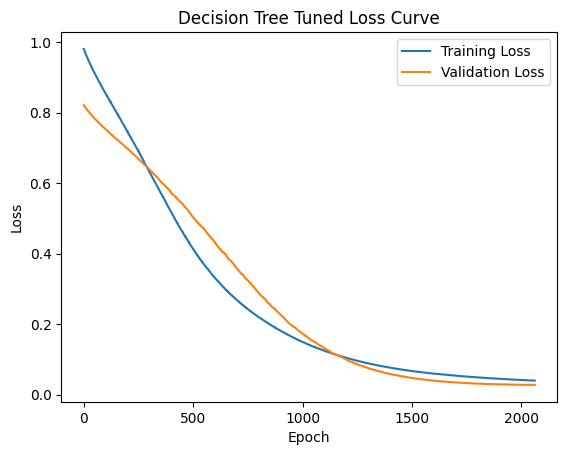

1/1 [==============================] - 0s 25ms/step


,Model,R2 Training Score,RMSE Training Score,R2 Testing Score,RMSE Testing Score
0,Decision Tree Tuned,0.96014,56.993079,0.886433,105.489315


In [ ]:
lstm_model(X_tuned,y,input_shape=(1,X_tuned.shape[1]),model_name='Decision Tree Tuned')

# Experiment 8 - Soil Type Addition

In [ ]:
X = data.iloc[:, :-1]
X = X.loc[:, ~X.columns.str.contains('9')]
y = data['Yield']

In [ ]:
X_tuned, best_params = random_forest_tuning(X, y)
#print("Selected Features:", X_selected.columns)
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


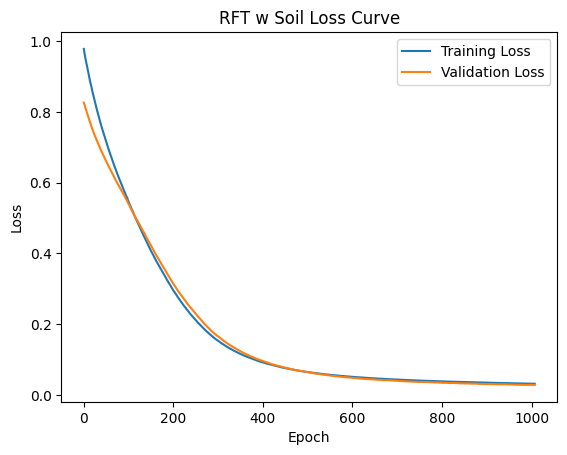

1/1 [==============================] - 0s 18ms/step


,Model,R2 Training Score,RMSE Training Score,R2 Testing Score,RMSE Testing Score
0,RFT w Soil,0.966739,52.061958,0.936737,78.733182


In [ ]:
lstm_model(X_tuned,y,input_shape=(1,X_tuned.shape[1]),model_name='RFT w Soil')

In [ ]:
X_tuned, best_params = decision_tree_tuning(X, y)
#print("Selected Features:", X_selected.columns)
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


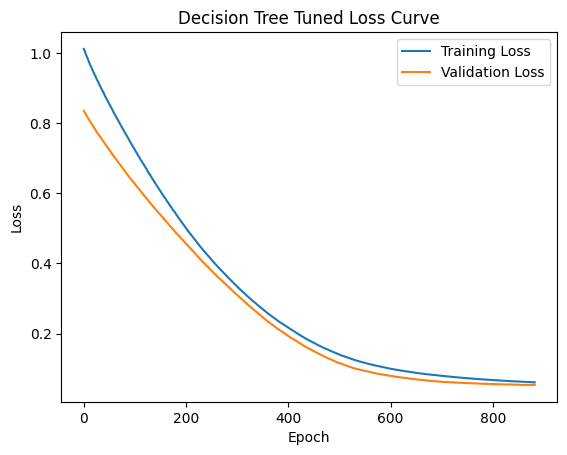

1/1 [==============================] - 0s 16ms/step


,Model,R2 Training Score,RMSE Training Score,R2 Testing Score,RMSE Testing Score
0,Decision Tree Tuned,0.93606,72.183428,0.960482,62.226731


In [ ]:
lstm_model(X_tuned,y,input_shape=(1,X_tuned.shape[1]),model_name='Decision Tree Tuned')

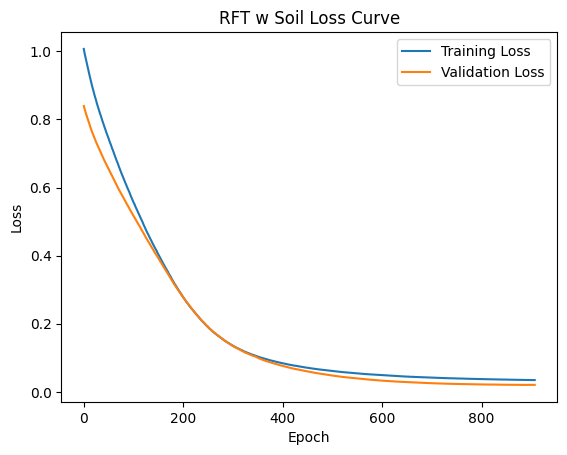

1/1 [==============================] - 0s 22ms/step


In [ ]:
score_df, trained_model = lstm_model(X_tuned,y,input_shape=(1,X_tuned.shape[1]),model_name='RFT w Soil')

In [ ]:
score_df

,Model,R2 Training Score,RMSE Training Score,R2 Testing Score,RMSE Testing Score
0,RFT w Soil,0.966446,52.290837,0.96089,61.905429


In [ ]:
X_tuned.shape

(79, 18)

In [ ]:
trained_model.save('trained_lstm_model.h5')